--------------------
# TRABAJO PRACTICO 1
--------------------

Alumno: Matias Tripode


## Referencias  para el Ejercicio 1)

- 1. Algoritmo de Optimización del Gradiente Descendent: https://www.youtube.com/watch?v=iyMFcF36gO0&list=PLT81OVhq-1oEr9XIKszWvLXjzv4bb_5xj&index=44&ab_channel=OssabaTech
- 2. Gentle Introduction to the Adam Optimization Algorithm for Deep Learning https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/


## 1a) Implementación del Gradiente Descendente (1 punto)

In [1]:
# importar librerias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# -----------------------------------
# Funciones a utilizar en GD y ADAM
# -----------------------------------

# Función no lineal
def funcion_no_lineal(W, X, b):
    return np.tanh(W * X + b)

# Función de costo MSE
def compute_cost(y_hat, y):
    return np.mean((y_hat - y) ** 2)

# Cálculo de gradientes
def gradiente(y_hat, data_y, data_x, z):
    dz = (y_hat - data_y) * (1 - np.tanh(z)**2)
    dw = np.mean(dz * data_x)
    db = np.mean(dz)
    return (dz, dw, db)

# Función de activacion
def activacion(z):
    return np.tanh(z)

# Funcion para graficar
def graficarHistorial(plt, cost_history, learning_rate, n_epochs):
    plt.plot(range(n_epochs), cost_history, label=f'lr={learning_rate}')

def mostrarGrafico(plt, nombre_algoritmo):
    plt.title(f"Costo J(w, b) vs Número de épocas ({nombre_algoritmo})")
    plt.xlabel("Épocas")
    plt.ylabel("Costo (MSE)")
    plt.legend()
    plt.grid(True)
    plt.show()

def configurarGrafico(plt):
    plt.figure(figsize=(8, 6))

def graficarAjusteFinal(plt, data_x, data_y, w, b):
    # Visualización del ajuste final
    plt.scatter(data_x, data_y, color='blue', alpha=0.5, label='Datos')
    plt.plot(data_x, funcion_no_lineal(w, data_x, b), color='red', label='Modelo ajustado')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Tamańo del data set
data_set_size = 100

# Hiperparámetros
learning_rates = [0.1, 0.01, 0.001]
epochs = 200


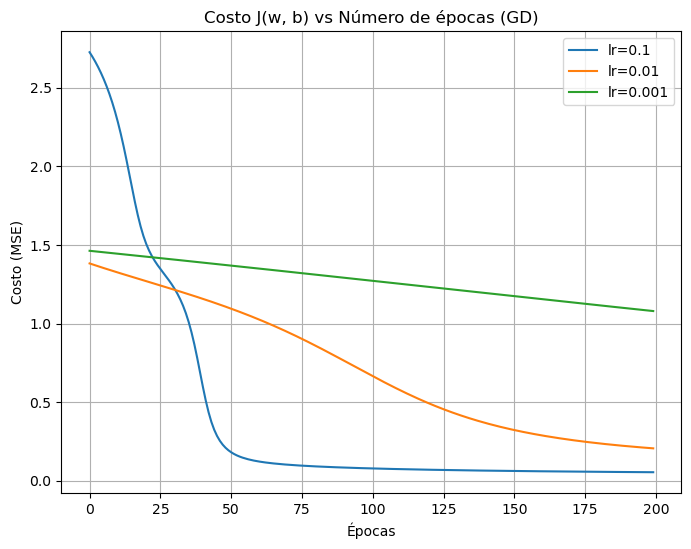

In [3]:
# --------------------
# Generación de datos
# --------------------
data_x = np.linspace(-2, 2, data_set_size).reshape(-1, 1)  # vector aleatorio con 100 valores entre -2 y 2
np.random.seed(42)
# valores reales a estimar
true_w, true_b = 2.5, -1.0
ruido = 0.2 * np.random.randn(data_set_size, 1)
# Funcion y datos a aproximar
data_y =  funcion_no_lineal(true_w, data_x, true_b) + ruido


# ------------------
# Implementacion GD
# ------------------
def gradienteDescendiente(plt, data_x, data_y, epochs, learning_rates, graficar_historial = True):
    for learning_rate in learning_rates:
        # Inicializar valores de  𝑤  y  𝑏  de manera aleatoria con np.random.randn() 
        w = np.random.randn()
        b = np.random.randn()
        # Guarda el historial para luego graficarlo
        cost_history = []
        # Inicialización de trayectoria
        trajectoria = [] # Se utiliza en grafica 3D en 1C)
        for _ in range(epochs):
            z = w * data_x + b
            y_hat = activacion(z)
            cost = compute_cost(y_hat, data_y)
            cost_history.append(cost)
            trajectoria.append((w, b, cost))

            # Cálculo de gradientes
            _, dw, db =  gradiente(y_hat, data_y, data_x, z)

            # Actualización de parámetros
            w -= learning_rate * dw
            b -= learning_rate * db

        # Visualización de la trayectoria de aprendizaje
        if graficar_historial:
            graficarHistorial(plt, cost_history, learning_rate, epochs)
    return (trajectoria, w, b)

# Configurar grafico
configurarGrafico(plt)
# Ejecutar GD
gradienteDescendiente(plt, data_x, data_y, epochs, learning_rates)
# Graficar GD
mostrarGrafico(plt, "GD")



## 1b) Implementación de Adam (1.5 puntos)

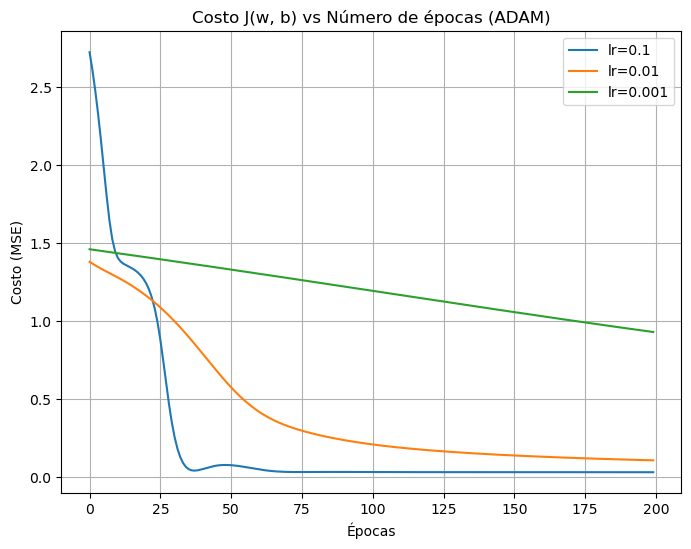

In [4]:
# --------------------
# Generación de datos
# --------------------
data_x = np.linspace(-2, 2, data_set_size).reshape(-1, 1)  # vector aleatorio con 100 valores entre -2 y 2
np.random.seed(42)
# valores reales a estimar
true_w, true_b = 2.5, -1.0
ruido = 0.2 * np.random.randn(data_set_size, 1)
# Funcion y datos a aproximar
data_y =  funcion_no_lineal(true_w, data_x, true_b) + ruido

# Parámetros
beta1 = 0.9 # 𝛽1=0.9 Controla el promedio móvil del primer momento (la media de los gradientes)
beta2 = 0.999 #  β2=0.999: Controla el promedio móvil del segundo momento (la varianza de los gradientes)
epsilon = 1e-8 # ϵ=1e−8: Pequeño valor añadido para evitar la división por cero

# β1 controla la velocidad de adaptación del gradiente.
# 𝛽2 estabiliza el cálculo de la varianza.
# 𝜖 garantiza la estabilidad numérica.

# Implementacion ADAM 
def gradiente_adam(plt, data_x, data_y, beta1, beta2, epsilon, learning_rates, graficar_historial = True):
    for learning_rate in learning_rates:
        w = np.random.randn()
        b = np.random.randn()
        cost_history = []
        # Inicialización de Adam
        m_w, v_w = 0, 0
        m_b, v_b = 0, 0
        # Inicialización de trayectoria
        trajectoria = [] # Se utiliza en grafica 3D en 1C)

        for t in range(1, epochs + 1):
            z = w * data_x + b
            y_hat = activacion(z)
            cost = compute_cost(y_hat, data_y)
            cost_history.append(cost)
            trajectoria.append((w, b, cost))
            
            # Cálculo de gradientes
            _, dw, db =  gradiente(y_hat, data_y, data_x, z)

            # Actualización de momentos
            m_w = beta1 * m_w + (1 - beta1) * dw
            v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)

            m_b = beta1 * m_b + (1 - beta1) * db
            v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

            # Corrección de sesgo
            m_w_corr = m_w / (1 - beta1 ** t)
            v_w_corr = v_w / (1 - beta2 ** t)

            m_b_corr = m_b / (1 - beta1 ** t)
            v_b_corr = v_b / (1 - beta2 ** t)

            # Actualización de parámetros
            w -= learning_rate * m_w_corr / (np.sqrt(v_w_corr) + epsilon)
            b -= learning_rate * m_b_corr / (np.sqrt(v_b_corr) + epsilon)

        # Visualización de la trayectoria de aprendizaje
        if graficar_historial:
            graficarHistorial(plt, cost_history, learning_rate, epochs)
    return (trajectoria, w, b)

# Configurar Grafico
configurarGrafico(plt)

# Ejecutar GD con optimizacion ADAM
gradiente_adam(plt, data_x, data_y, beta1, beta2, epsilon, learning_rates)

mostrarGrafico(plt, "ADAM")




## 1c) Visualización en 3D de la trayectoria de aprendizaje (0.5 puntos)

In [5]:
def graficarAprendizajeEnSuperficieDeCosto(data_x, data_y, trayectoria_gd, trayectoria_adam):
    # Graficar la superficie de costo
    w_vals = np.linspace(-3, 3, 100)
    b_vals = np.linspace(-3, 3, 100)
    W, B = np.meshgrid(w_vals, b_vals)

    cost_surface = np.array([[compute_cost(activacion(W[i, j] * data_x + B[i, j]), data_y)
                            for j in range(B.shape[1])]
                            for i in range(W.shape[0])])

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W, B, cost_surface, alpha=0.3, cmap='viridis')

    # Añadir trayectorias
    trayectoria_gd = np.array(trayectoria_gd)
    trayectoria_adam = np.array(trayectoria_adam)
    ax.plot(trayectoria_gd[:, 0], trayectoria_gd[:, 1], trayectoria_gd[:, 2], marker='o', color='red', label='GD')
    ax.plot(trayectoria_adam[:, 0], trayectoria_adam[:, 1], trayectoria_adam[:, 2], marker='o', color='blue', label='Adam')

    ax.set_xlabel("w")
    ax.set_ylabel("b")
    ax.set_zlabel("Costo")
    plt.legend()
    plt.title("Trayectoria de Aprendizaje en la Superficie de Costo")
    plt.show()


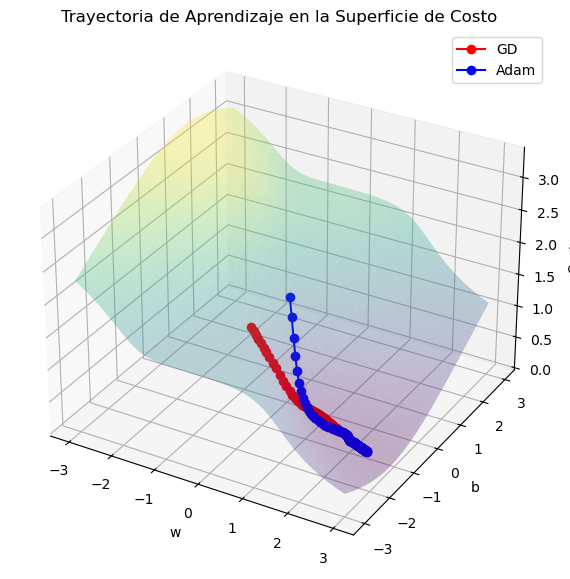

In [6]:
# Generación de datos
data_x = np.linspace(-2, 2, 100).reshape(-1, 1)
np.random.seed(42)
true_w, true_b = 2.5, -1.0
noise = 0.2 * np.random.randn(100, 1)
data_y = np.tanh(true_w * data_x + true_b) + noise


# Parámetros
n_epochs = 100
learning_rate = 0.1

# ---------------------
# Gradiente Descendente
# ---------------------
w_gd = np.random.randn()
b_gd = np.random.randn()

trayectoria_gd, w_gd, b_gd = gradienteDescendiente(plt, data_x, data_y, epochs, [learning_rate], graficar_historial=False)


# ---------------------
# ADAM
# ---------------------

# Parámetros
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

trayectoria_adam, w_adam, b_adam = gradiente_adam(plt, data_x, data_y, beta1, beta2, epsilon, [learning_rate], graficar_historial=False)

# Graficar en 3D la trayectoria del aprendizaje de ambos optimizadores sobre la superficie de la función de costo  𝐽(𝑤,𝑏)
graficarAprendizajeEnSuperficieDeCosto(data_x, data_y, trayectoria_gd, trayectoria_adam)


-------------------

## 2a) EDA y preparación del dataset (2 puntos)
Realizar el análisis exploratorio del dataset (EDA) con las herramientas vistas en materias anteriores. Pre-procesar las variables, explicar los criterios utilizados y analizar las distribuciones.

Vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece a una categoría: "Casual" (gasta menos de 5000), "Gama media" (gasta entre 5000 y 10000), "Fiel" (gasta entre 10000 y 15000) o a "Premium" (gasta más de 15000).

# Pre-processamiento 

En esta etapa buscamos:
- Entender los datos.
- Ver caracteristicas de los datos
- Detectar irregularidades (outliers) de los datos
- Obtener valores estadisticao de los datos
- Realizar visualizationes rapidas que faciliten el proceso de exploracion.



Para realizar el preprocesamiento de datos debemos hacernos las siquientes preguntas
1. Cual es el objetivo del analisis? En este caso lo sabemos por que es parte del enunciado.
2. Cual es la wariable objectivo? En nuestro caso definimos como`Purchase_Category` (ver mas abajo)
3. Que variables afectan mas a la variable objectivo? Que metodos podemos utilizar?
4. Como tratamos a los valores nulos?
5. Como tratamos a las variables categoricas?


## REFERENCIAS

**7506 - Organización de Datos**
- [Clase 4: Analisis Exploratorio de Datos 1, Introduccion al set Spotify, Analisis de Propiedades](https://www.youtube.com/watch?v=NoJs5JIjmJw&list=PLeo_qKwGPZYdpiXwkwDzNq9L_9OMFfd41&ab_channel=7506-Organizaci%C3%B3ndeDatos)
- [2021-04-21 - Clase Practica - Feature Engineering](https://www.youtube.com/watch?v=ZL8XWqAOapI&t=807s&ab_channel=datosfiuba)


In [7]:
# importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
# Cargar los datos
df = pd.read_csv('dataset_black_sales.csv')

## Haremos paso a paso el analsis de los datos

**Chequeamos si alguna columna tiene valores no validos**

In [9]:
tienen_guion = df.astype(str).eq('-').any(axis=0)
tienen_guion

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

**Veamos como luce el data frame**

In [10]:
# Veamos como luce el data frame
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**Ver valores unicos por columna**

In [11]:
df['Age'].unique()
# retorna '0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25' dtype=object

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df['Stay_In_Current_City_Years'].unique()
# retorna '2', '4+', '3', '1', '0' dtype=object

array(['2', '4+', '3', '1', '0'], dtype=object)

In [13]:
df['Product_Category_1'].unique()
# retorna  3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17, 9, 20, 19

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [14]:
df['Product_Category_2'].unique()
# retorna: nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10., 17., 13.,  7., 18.

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [15]:
df['Product_Category_3'].unique()
# retorna: nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3., 18., 11., 10.

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [16]:
df['Occupation'].unique()
# returna: 10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18, 5, 14, 13,  6

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [17]:
df['City_Category'].unique()
# retorna: 'A', 'C', 'B'


array(['A', 'C', 'B'], dtype=object)

NOTA: Vemos que `Product_Category_1` tiene valores del tipo entero, encambio `Product_Category_2` y `Product_Category_3` tienen valores del tipo double.

**Ver informacion estadistica del data frame**

In [18]:
# podemos ver informacion de las columnas y atributos del frame
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


**Resumen estadístico**

In [19]:
print(df.describe())

            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5

**Ver las dimensiones del data frame**

In [20]:
# ver las dimensiones del data frame
df.shape

(550068, 12)

**Ver que columnas tiene valores nulos**

In [21]:
# ver que columnas tiene valores nulos
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

La cantidad de valores `no nulos` obtenidos mas arriba de ejecutar `df.info() ` son:

```
| Columna               |  Cantidad de NO nulos  |
| Product_Category_2    |   376430               | 
| Product_Category_3    |   166821               | 
```

Pero al ejecutar `df.isnull().sum()` vemos que las siguientes dos columnas tienen un gran % de `valores nulos`.
```
| Columna               |  Cantidad de nulos  |
| Product_Category_2    |   173638            | 
| Product_Category_3    |   383247            | 
```
`NOTA`: Entonces debemos hacer algun tratamiento de valores nulos para no perder tanta cantidad de filas de nuestro data frame

In [22]:
# Vamos a rellenar los valores faltantes con la moda de la columna.
df.update(df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0]))
df.update(df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0]))

# Convertir las columanas a enteros como es `Product_Category_1`
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)


In [23]:
# Volver a ver que columnas tiene valores nulos. No deberian existir nulos dado el tratamiento dado a a las columnas `Product_Category_2` y `Product_Category_3`
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

**Clasificación de clientes**

In [24]:
# Clasificación de clientes
def categorize_purchase(value):
    if value < 5000:
        return 'Casual'
    elif 5000 <= value < 10000:
        return 'Gama media'
    elif 10000 <= value < 15000:
        return 'Fiel'
    else:
        return 'Premium'

# Aplicar la función
df['Purchase_Category'] = df['Purchase'].apply(categorize_purchase)

**Codificar variables categoricas**

In [25]:
from sklearn.preprocessing import LabelEncoder

# Codificación de variables categóricas
# El `LabelEncoder` codifica etiquetas con valores entre 0 y n_clases - 1.
# label_encoder = LabelEncoder()
# df['Gender'] = label_encoder.fit_transform(df['Gender']) 
# df['City_Category'] = label_encoder.fit_transform(df['City_Category']) 

# One-Hot Encoding para otras variables categóricas
# Con `drop_first=True` quito las primeras columnas por cada clase a codificar, para evitar generar una relacion lineal entre valores.
df_encoded = pd.get_dummies(df, columns=['Marital_Status', 'Age', 'Gender', 'City_Category', 'Stay_In_Current_City_Years'], drop_first=True) # 'City_Category'

# Eliminar columnas no numéricas para calcular la matrix de correlación
df_numeric = df_encoded.drop(['Product_ID', 'Stay_In_Current_City_Years', 'Purchase_Category', 'City_Category'], axis=1, errors='ignore')

In [26]:
# Normalización de la variable Purchase
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_numeric['Purchase'] = scaler.fit_transform(df_numeric[['Purchase']])

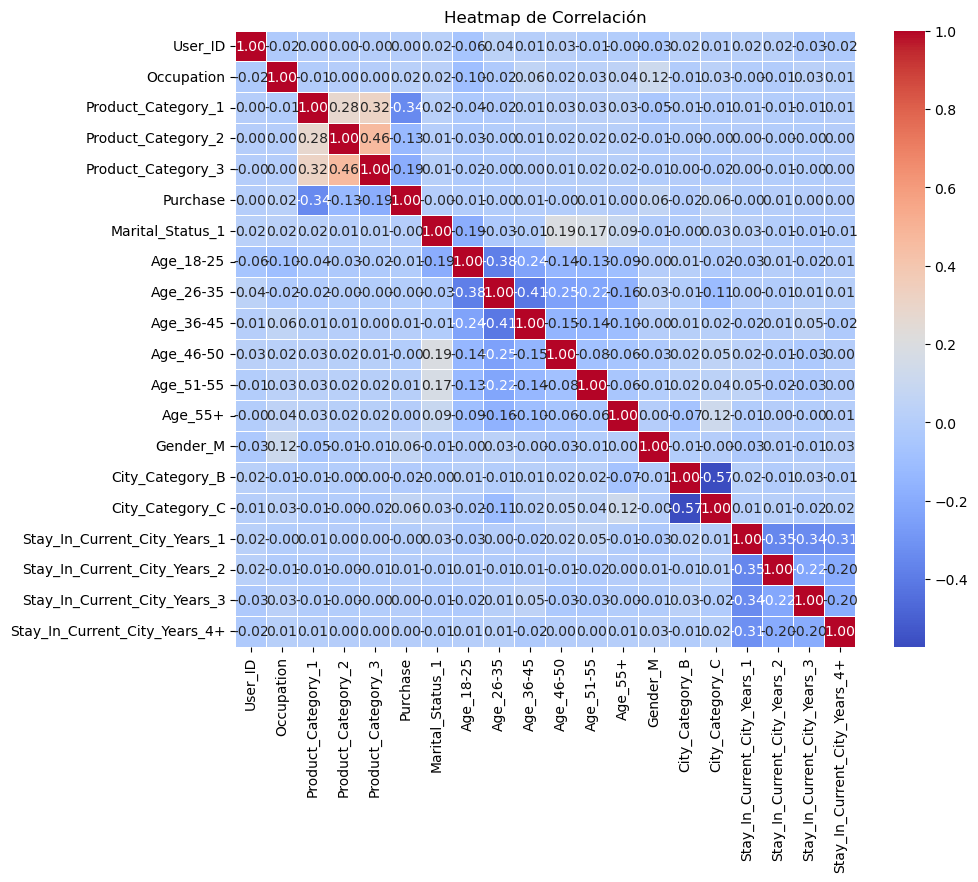

In [27]:
import warnings
# Suprimir la advertencia
warnings.filterwarnings("ignore", category=UserWarning)

# Matriz de correlación
correlation_matrix = df_numeric.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlación')
plt.show()

**Visualización de la distribución de compras**

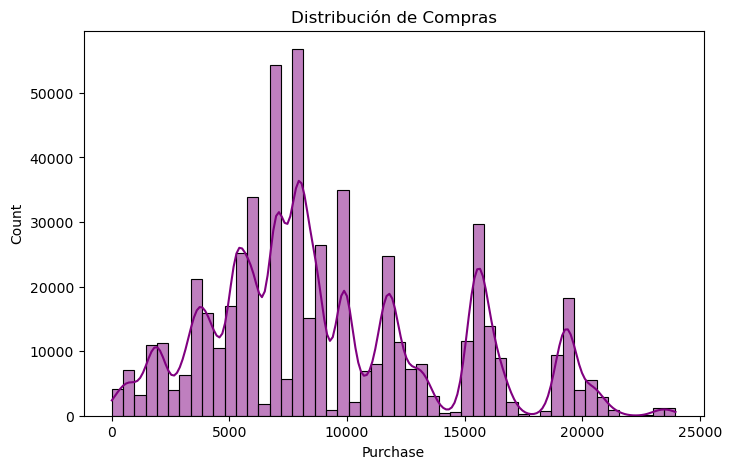

In [28]:
# Visualización de la distribución de compras
plt.figure(figsize=(8, 5))
sns.histplot(df['Purchase'], bins=50, kde=True, color='purple')
plt.title("Distribución de Compras")
plt.show()

**Visualizacion de la distribución por categoría de cliente**

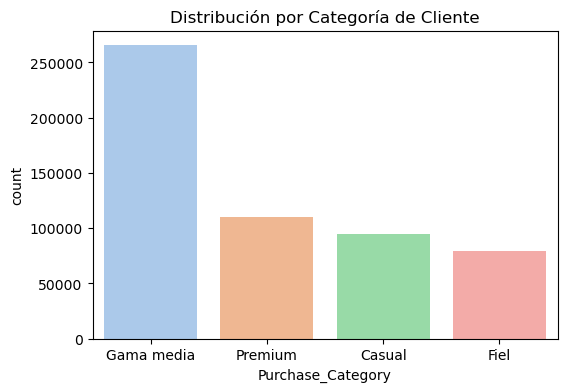

In [29]:
# Distribución por categoría de cliente
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchase_Category',  hue='Purchase_Category',data=df, palette='pastel')
plt.title("Distribución por Categoría de Cliente")
plt.show()

**Visualizacion de la distribución de variables numéricas**


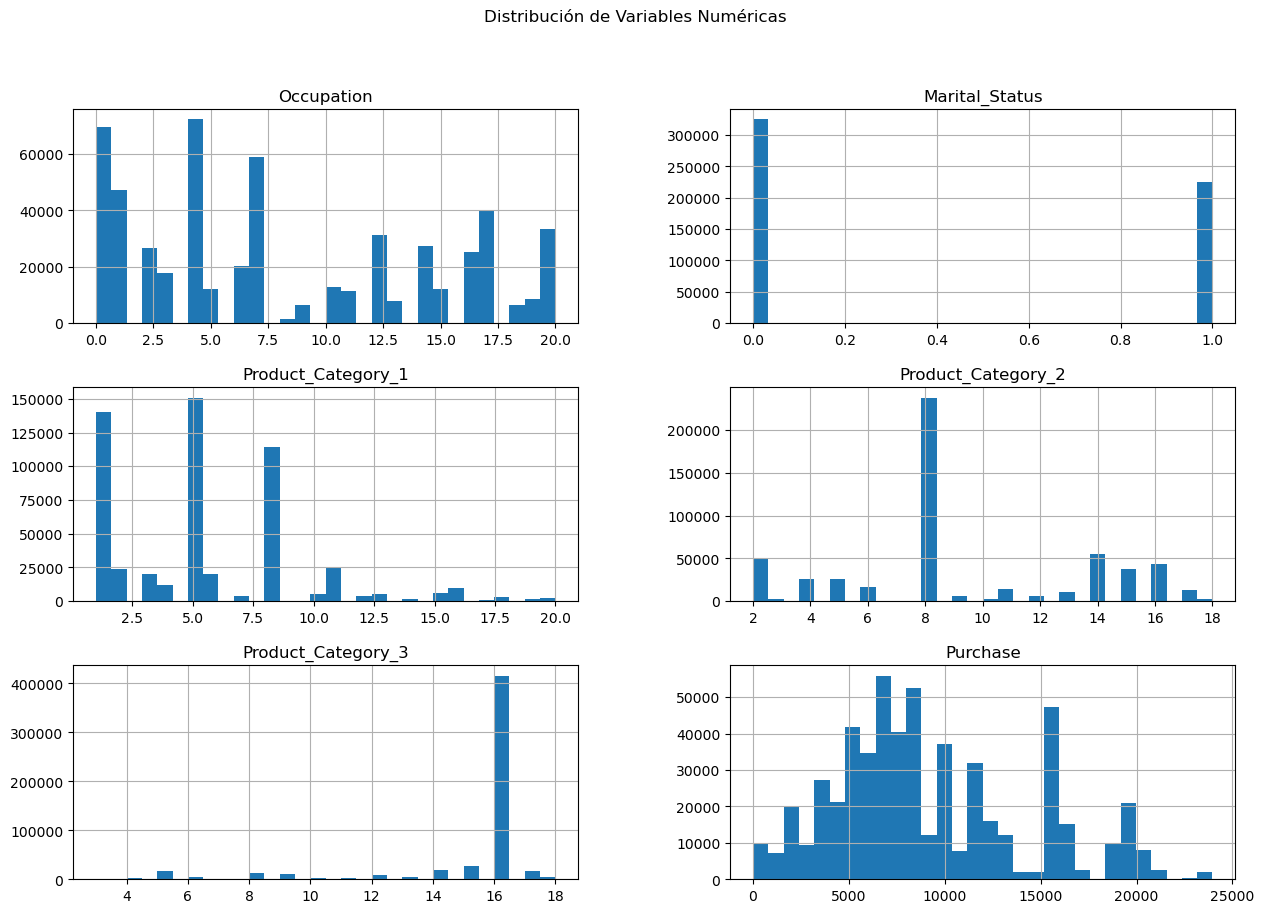

In [30]:
columnas_a_excluir = ['User_ID']
df_filtrado = df.drop(columns=columnas_a_excluir)


df_filtrado.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()
plt.close()

**Distribución de variables categóricas**

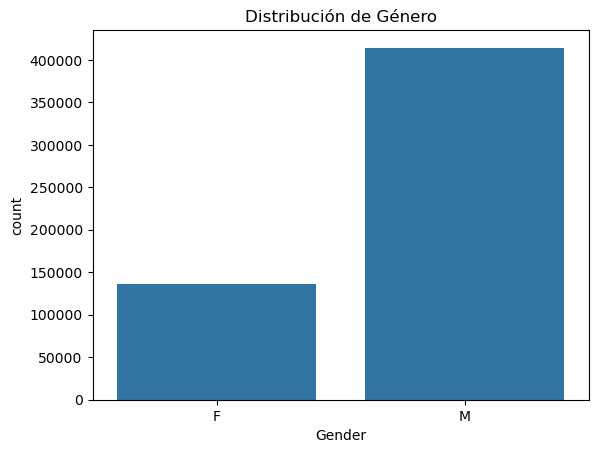

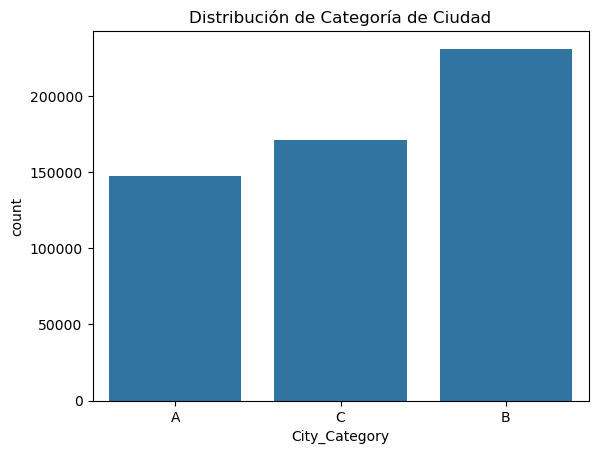

In [31]:
sns.countplot(x='Gender', data=df)
plt.title('Distribución de Género')
plt.show()
plt.close()

sns.countplot(x='City_Category', data=df)
plt.title('Distribución de Categoría de Ciudad')
plt.show()
plt.close()

-----------------

## 2b) Benchmark de modelos de ML clásico (1 punto)

Definir uno o varios puntos de comparación (benchmark) para comparar entre sí al menos 2 modelos distintos. Estos deben ser modelos de ML clásico de la librería sklearn de fácil y rápido entrenamiento.



**Dividimos el dataset en conjuntos de entrenamiento y prueba.**

In [32]:
from sklearn.model_selection import train_test_split

# Hago drop de las siquientes columnas
X = df_encoded.drop(['User_ID', 'Product_ID', 'Purchase', 'Purchase_Category'], axis=1)
# Variable target `Purchase_Category`
y = df_encoded['Purchase_Category']

# Dividir los datos 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Utilizamos un árbol de decisión como primer modelo de comparación.**

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Entrenar el modelo
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predecir y evaluar
y_pred_dt = dt.predict(X_test)
print("Árbol de Decisión:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Árbol de Decisión:
              precision    recall  f1-score   support

      Casual       0.64      0.48      0.54     28424
        Fiel       0.40      0.39      0.39     23612
  Gama media       0.78      0.83      0.80     79842
     Premium       0.61      0.66      0.64     33143

    accuracy                           0.67    165021
   macro avg       0.61      0.59      0.59    165021
weighted avg       0.67      0.67      0.67    165021

Accuracy: 0.6717205688972918


**Utilizamos una regresión logística como segundo modelo de comparación.**

In [34]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predecir y evaluar
y_pred_lr = lr.predict(X_test)
print("Regresión Logística:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Regresión Logística:
              precision    recall  f1-score   support

      Casual       0.48      0.08      0.14     28424
        Fiel       0.39      0.09      0.15     23612
  Gama media       0.56      0.95      0.70     79842
     Premium       0.50      0.29      0.37     33143

    accuracy                           0.54    165021
   macro avg       0.48      0.35      0.34    165021
weighted avg       0.51      0.54      0.46    165021

Accuracy: 0.5431672332612213


**Comparativa**

Vemos que el `DecisionTreeClassifier` tiene mejor `Accuracy: 0.6858824028456985` vs el `LogisticRegression` con `Accuracy: 0.5423552153968283`

--------------------

## Funcion obtener el device 

In [35]:
import torch

## 2c) Modelo de deep leaning sin embeddings (1.5 puntos)

Entrenar un modelo de deep learning usando Pytorch que no utilice embeddings, descartando el product_id y user_id. Graficar las evoluciones de la función de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.


In [36]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [37]:
# df_numeric no contiene 'User_ID', 'Product_ID'
df = df_numeric

# Codificar la variable objetivo
label_encoder = LabelEncoder()
df['Purchase_Category'] = label_encoder.fit_transform(df_encoded['Purchase_Category'])


In [38]:
# Convertir todas las columnas booleanas a enteros (0 y 1)
df = df.astype(int)

# Dividir el dataset en características y etiquetas
X = df.drop('Purchase_Category', axis=1).values
y = df['Purchase_Category'].values

# Convertir a tensores de PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

In [39]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [40]:
# Crear DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

**Definimos un modelo de red neuronal simple con dos capas ocultas.**

In [55]:
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleClassifier, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_size)
        self.activacion = nn.ReLU()

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        out = self.linear1(x)
        out = self.activacion(out)
        #
        out = self.linear2(out)
        out = self.activacion(out)
        #
        out = self.linear3(out)
        return out

In [56]:
# Definir el modelo
input_size = X_train.shape[1]
hidden_size = 128
output_size = len(label_encoder.classes_)
model = SimpleClassifier(input_size, hidden_size, output_size)

**Definición de la Función de Costo y Optimizador**

In [60]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

**Entrenamiento del Modelo**

In [ ]:
num_epochs = 20
train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validación
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

**Gráficas de Evolución**

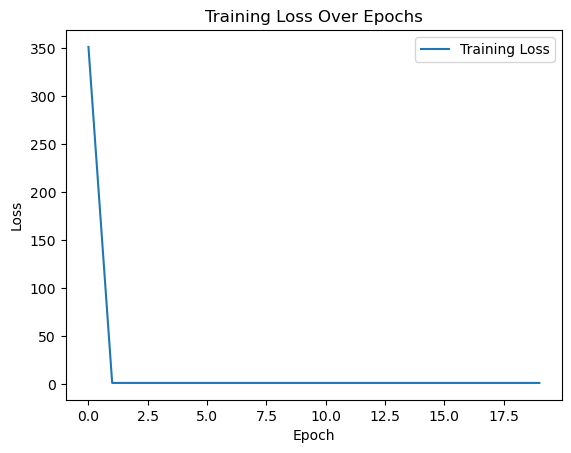

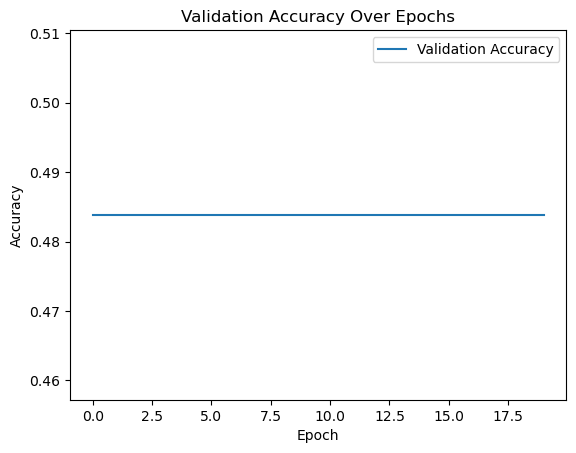

In [45]:
import matplotlib.pyplot as plt

# Gráfica de la función de costo
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Gráfica de la precisión en validación
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.show()

--------------------

## 2d) Modelo de deep leaning con embeddings (2 puntos)

**Definición del Modelo con Embeddings**

In [46]:
class EmbeddingModel(nn.Module):
    def __init__(self, num_users, num_products, embedding_dim, hidden_size, output_size):
        super(EmbeddingModel, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.product_embedding = nn.Embedding(num_products, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * 2 + X_train.shape[1] - 2, hidden_size)  # -2 porque User_ID y Product_ID se reemplazan por embeddings
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        user_ids = x[:, 0].long()  # User_ID es la primera columna
        product_ids = x[:, 1].long()  # Product_ID es la segunda columna
        other_features = x[:, 2:]  # Resto de las características

        user_embedded = self.user_embedding(user_ids)
        product_embedded = self.product_embedding(product_ids)

        # Concatenar embeddings con otras características
        combined = torch.cat([user_embedded, product_embedded, other_features], dim=1)
        out = self.fc1(combined)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out


**Preparación del Dataset**

In [47]:
# Reutilizamos el `df_encoded`
df = df_encoded

# Codificar la variable objetivo (Purchase_Category)
label_encoder = LabelEncoder()
df['Purchase_Category'] = label_encoder.fit_transform(df['Purchase_Category'])

# Convertir User_ID y Product_ID a índices categóricos
df['User_ID'] = df['User_ID'].astype('category').cat.codes
df['Product_ID'] = df['Product_ID'].astype('category').cat.codes

# Convertir todas las columnas booleanas a enteros (0 y 1)
df = df.astype(int)

# Dividir el dataset en características y etiquetas
X = df.drop('Purchase_Category', axis=1).values
y = df['Purchase_Category'].values

**Convertir a tensores de PyTorch**

In [48]:
# Convertir a tensores de PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


**Definir el modelo**

In [49]:
# Definir el modelo
num_users = df['User_ID'].nunique()
num_products = df['Product_ID'].nunique()
embedding_dim = 10  # Dimensión de los embeddings
hidden_size = 128
output_size = len(label_encoder.classes_)

model = EmbeddingModel(num_users, num_products, embedding_dim, hidden_size, output_size)

**Definición de la Función de Costo y Optimizador**

In [50]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

**Entrenamos el modelo durante varias épocas y registramos la evolución de la función de costo y la precisión en el conjunto de validación.**

In [51]:
num_epochs = 20
train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validación
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

Epoch [1/20], Loss: 1.2538, Validation Accuracy: 0.9489
Epoch [2/20], Loss: 0.1573, Validation Accuracy: 0.9687
Epoch [3/20], Loss: 0.0879, Validation Accuracy: 0.9816
Epoch [4/20], Loss: 0.0675, Validation Accuracy: 0.9719
Epoch [5/20], Loss: 0.0568, Validation Accuracy: 0.9834
Epoch [6/20], Loss: 0.0519, Validation Accuracy: 0.9839
Epoch [7/20], Loss: 0.0550, Validation Accuracy: 0.9633
Epoch [8/20], Loss: 0.0449, Validation Accuracy: 0.9367
Epoch [9/20], Loss: 0.0426, Validation Accuracy: 0.9838
Epoch [10/20], Loss: 0.0419, Validation Accuracy: 0.9837
Epoch [11/20], Loss: 0.0401, Validation Accuracy: 0.9842
Epoch [12/20], Loss: 0.0393, Validation Accuracy: 0.9844
Epoch [13/20], Loss: 0.0386, Validation Accuracy: 0.9806
Epoch [14/20], Loss: 0.0382, Validation Accuracy: 0.9840
Epoch [15/20], Loss: 0.0369, Validation Accuracy: 0.9839
Epoch [16/20], Loss: 0.0358, Validation Accuracy: 0.9840
Epoch [17/20], Loss: 0.0362, Validation Accuracy: 0.9839
Epoch [18/20], Loss: 0.0370, Validation 

**Graficamos la evolución de la función de costo y la precisión en el conjunto de validación.**

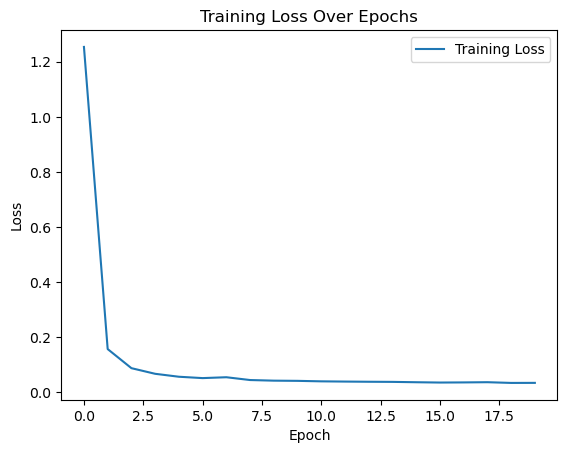

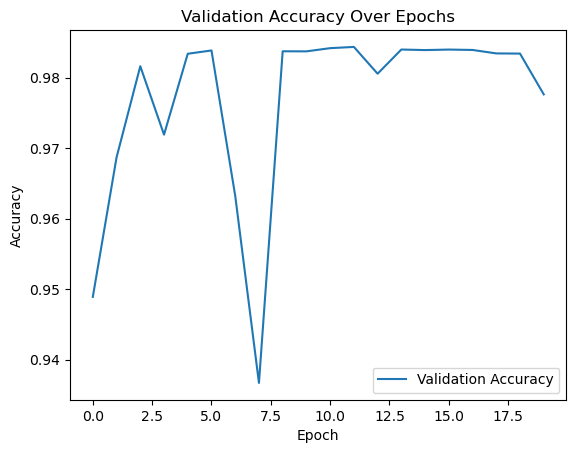

In [52]:
import matplotlib.pyplot as plt

# Gráfica de la función de costo
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Gráfica de la precisión en validación
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.show()

**Comparación con el Modelo sin Embeddings**

**Justificación de los Resultados**